In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time
import numpy as np

# Data Extraction - Spotify API

In [361]:
client_id = "f53385c1e4644f5e9ce76ad880d70089"
client_secret = "8cfa74625fa84c16b5aa0479d6281296"
scope = 'user-library-read'
token = spotipy.util.prompt_for_user_token(
    scope, 
    client_id= client_id, 
    client_secret=client_secret, 
    redirect_uri='http://localhost:8080/callback'
  )
sp = spotipy.Spotify(auth=token)

In [362]:
playlist_dic = {}
for playlist in sp.current_user_playlists()['items']:
    playlist_dic[playlist['name']] = playlist['uri'].split(':')[2]

print(playlist_dic)

{'Favourite_Rock_Music': '30d7XrYpQ7lPAeRS8rNORz'}


In [363]:
def generate_playlist_df(playlist_name, playlist_dic):
    
    playlist = pd.DataFrame()

    for i, j in enumerate(sp.playlist(playlist_dic[playlist_name])['tracks']['items']):
        playlist.loc[i, 'artist'] = j['track']['artists'][0]['name']
        playlist.loc[i, 'track_name'] = j['track']['name']
        playlist.loc[i, 'track_id'] = j['track']['id']
        playlist.loc[i, 'url'] = j['track']['album']['images'][1]['url']
        playlist.loc[i, 'date_added'] = j['added_at']
        playlist.loc[i, 'danceability'] = sp.audio_features(j['track']['id'])[0]['danceability']
        playlist.loc[i, 'energy'] = sp.audio_features(j['track']['id'])[0]['energy']
        playlist.loc[i, 'loudness'] = sp.audio_features(j['track']['id'])[0]['loudness']
        playlist.loc[i, 'acousticness'] = sp.audio_features(j['track']['id'])[0]['acousticness']
        playlist.loc[i, 'instrumentalness'] = sp.audio_features(j['track']['id'])[0]['instrumentalness']
        playlist.loc[i, 'valence'] = sp.audio_features(j['track']['id'])[0]['valence']
        playlist.loc[i, 'liveness'] = sp.audio_features(j['track']['id'])[0]['liveness']
        playlist.loc[i, 'tempo'] = sp.audio_features(j['track']['id'])[0]['tempo']
        playlist.loc[i, 'popularity'] = j['track']['popularity']
        playlist.loc[i, 'speechiness'] = sp.audio_features(j['track']['id'])[0]['speechiness']
        playlist.loc[i, 'genre'] = sp.artist(sp.track(j['track']['id'])["artists"][0]["external_urls"]["spotify"])['genres'][0]
        
        
        
        
        

    playlist['date_added'] = pd.to_datetime(playlist['date_added'])  

    return playlist
playlist_df = generate_playlist_df('Favourite_Rock_Music', playlist_dic) 

In [364]:
playlist_df

,artist,track_name,track_id,url,date_added,danceability,energy,loudness,acousticness,instrumentalness,valence,liveness,tempo,popularity,speechiness,genre
0,Linkin Park,Numb,2nLtzopw4rPReszdYBJU6h,https://i.scdn.co/image/ab67616d00001e02b4ad7e...,2022-05-24 16:48:44+00:00,0.496,0.863,-4.153,0.004600,0.000000,0.243,0.6390,110.018,80.0,0.0381,alternative metal
1,Linkin Park,In the End,60a0Rd6pjrkxjPbaKzXjfq,https://i.scdn.co/image/ab67616d00001e02e2f039...,2022-05-24 16:48:53+00:00,0.556,0.864,-5.870,0.009580,0.000000,0.400,0.2090,105.143,82.0,0.0584,alternative metal
2,Linkin Park,What I've Done,18lR4BzEs7e3qzc0KVkTpU,https://i.scdn.co/image/ab67616d00001e0246e207...,2022-05-24 16:49:01+00:00,0.623,0.930,-5.285,0.014100,0.000002,0.287,0.1380,120.119,76.0,0.0324,alternative metal
3,Linkin Park,Somewhere I Belong,3fjmSxt0PskST13CSdBUFx,https://i.scdn.co/image/ab67616d00001e0289a8fa...,2022-05-24 17:26:22+00:00,0.451,0.951,-3.754,0.000380,0.000002,0.442,0.2610,162.065,69.0,0.0645,alternative metal
4,Papa Roach,Last Resort,5W8YXBz9MTIDyrpYaCg2Ky,https://i.scdn.co/image/ab67616d00001e02985bf5...,2022-05-24 17:26:49+00:00,0.589,0.890,-3.719,0.000481,0.000820,0.692,0.2010,90.598,78.0,0.0603,alternative metal
5,The Offspring,The Future Is Now,2B17416FS7vL5qljgqfm7L,https://i.scdn.co/image/ab67616d00001e024b44a3...,2022-05-24 17:28:44+00:00,0.391,0.950,-2.224,0.003530,0.000000,0.297,0.3850,106.982,53.0,0.0758,alternative metal
6,The Offspring,Self Esteem,1FkoVC85Ds3mFoK0fVqEqP,https://i.scdn.co/image/ab67616d00001e020158cb...,2022-05-24 17:32:48+00:00,0.488,0.862,-7.595,0.020400,0.000000,0.706,0.3590,104.560,74.0,0.0476,alternative metal
7,The Offspring,Come Out Swinging,3T8Ht5f3xUejqEctN3RGb6,https://i.scdn.co/image/ab67616d00001e022d4c59...,2022-05-24 17:33:00+00:00,0.258,0.946,-5.965,0.000010,0.005330,0.636,0.0500,179.486,50.0,0.0657,alternative metal
8,The Offspring,Trust In You,6aUZTbyshptdpu7H6Mirjw,https://i.scdn.co/image/ab67616d00001e02890ce6...,2022-05-24 17:33:30+00:00,0.397,0.929,-3.888,0.000272,0.004640,0.672,0.0784,170.524,49.0,0.0583,alternative metal
9,Misfits,Dig Up Her Bones,16MPZDpM5JTtIBs3pOMSWx,https://i.scdn.co/image/ab67616d00001e02f16064...,2022-05-24 17:34:29+00:00,0.522,0.992,-4.708,0.003250,0.000008,0.144,0.1370,111.086,52.0,0.0925,horror punk


# EDA

##### Визуализируем альбомы из плейлиста.

In [223]:
from skimage import io
import matplotlib.pyplot as plt


def visualize_cover_art(playlist_df):
    temp = playlist_df['url'].values
    albums = []
    album_cover = []
    
    
    for i, url in enumerate(temp):
        if sp.track(playlist_df['track_id'].values[i])['album']['name'] not in albums:
            album_cover.append(sp.track(playlist_df['track_id'].values[i])['album']['images'][0]['url'])
            albums.append(sp.track(playlist_df['track_id'].values[i])['album']['name'])
        
    plt.figure(figsize=(15,int(0.625 * len(albums))) , facecolor='#1db954')
    columns = 5
    i = 0
    
    for album, cover in zip(albums, album_cover):
        plt.subplot(int(len(albums) / columns + 1), columns, i + 1)

        image = io.imread(cover)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        s='' 
        plt.xlabel(album, fontsize = 12)
        plt.tight_layout(h_pad=0.8, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        
        i += 1

    plt.show()

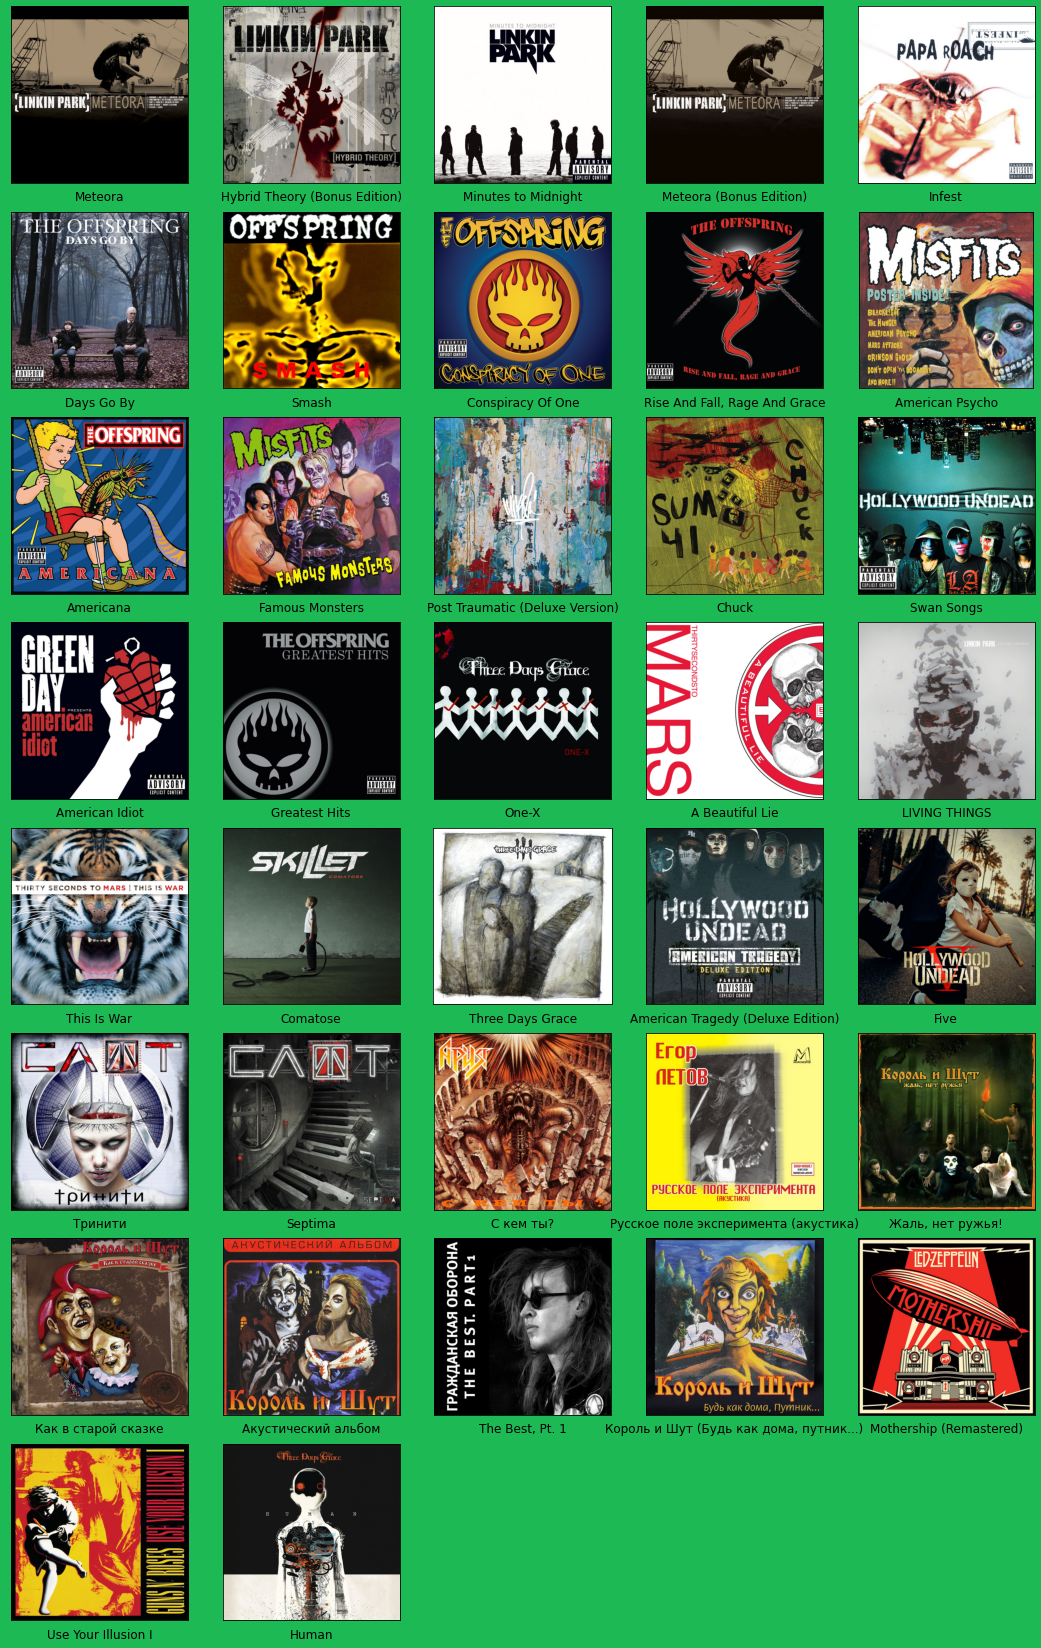

In [8]:
visualize_cover_art(playlist_df)

##### Посмотрим распределение артистов в плейлисте

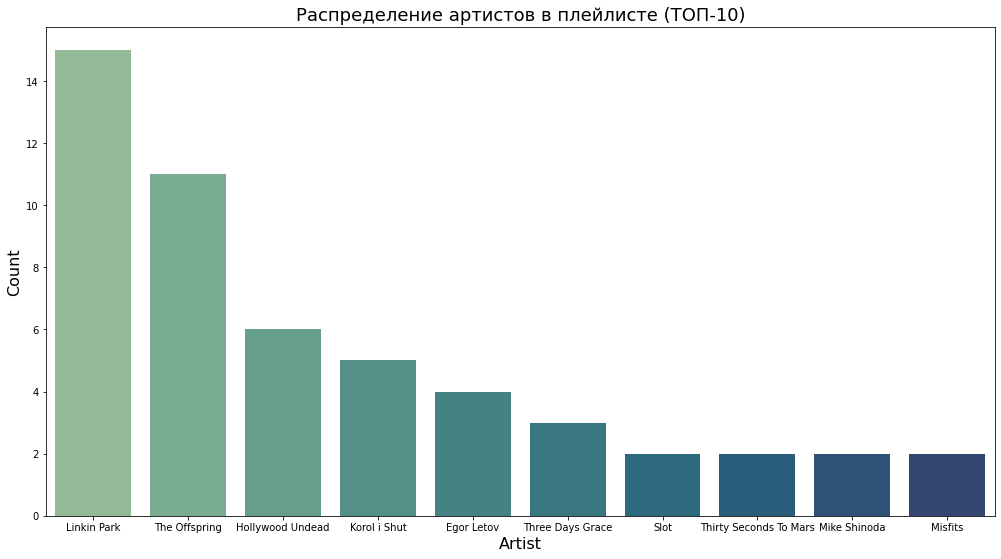

In [59]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(17,9))
ax = sns.countplot(x="artist", data=playlist_df, order=playlist_df.artist.value_counts().iloc[:10].index, palette='crest')
plt.title('Распределение артистов в плейлисте (ТОП-10)', fontsize=18)
plt.xlabel('Artist', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

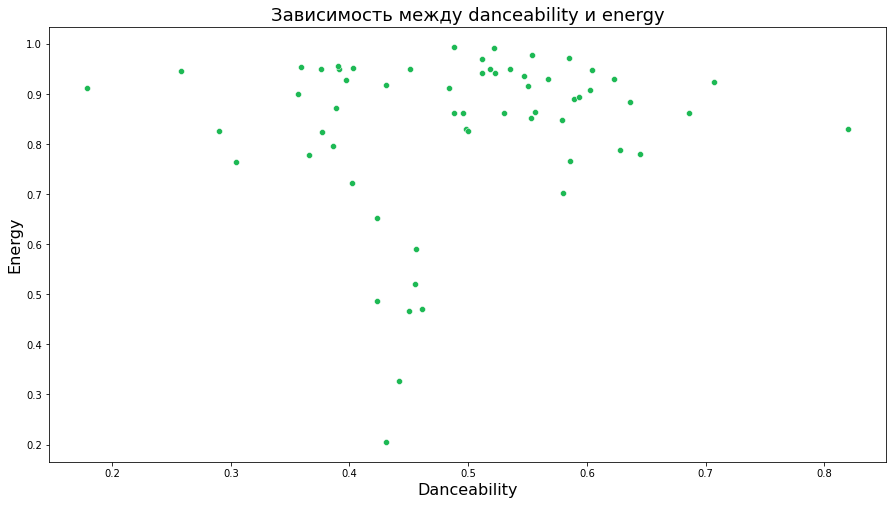

In [56]:
fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.scatterplot(x='danceability', y='energy', data=playlist_df, color='#1db954')
plt.title("Зависимость между danceability и energy", fontsize = 18)
plt.ylabel("Energy", fontsize=16)
plt.xlabel("Danceability", fontsize=16)
plt.show()

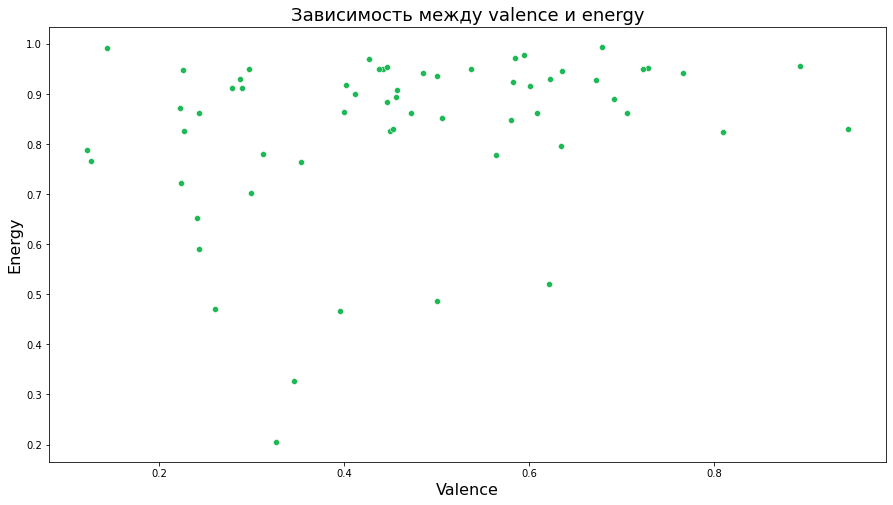

In [57]:
fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.scatterplot(x='valence', y='energy', data=playlist_df, color='#1db954')
plt.title("Зависимость между valence и energy", fontsize = 18)
plt.ylabel("Energy", fontsize=16)
plt.xlabel("Valence", fontsize=16)
plt.show()

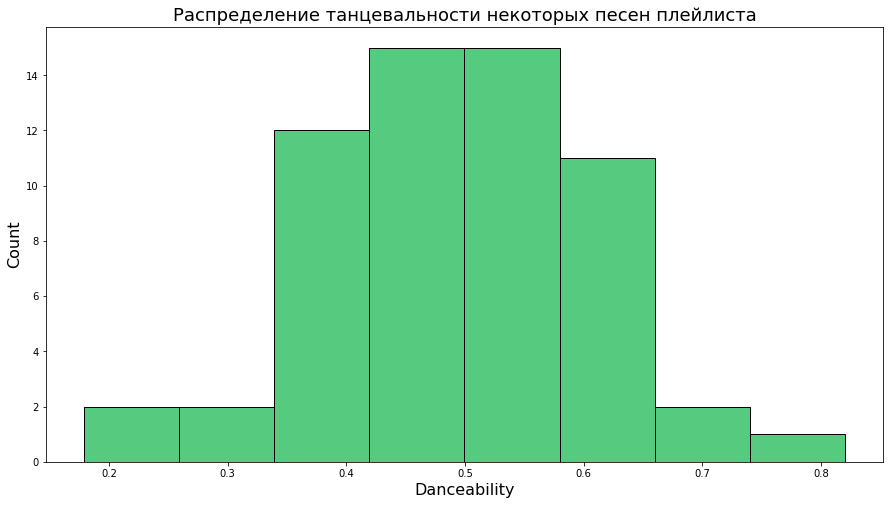

In [58]:
fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.histplot(x='danceability', data=playlist_df, color='#1db954')
plt.title('Распределение танцевальности некоторых песен плейлиста', fontsize = 18)
plt.ylabel("Count", fontsize=16)
plt.xlabel("Danceability", fontsize=16)
plt.show()

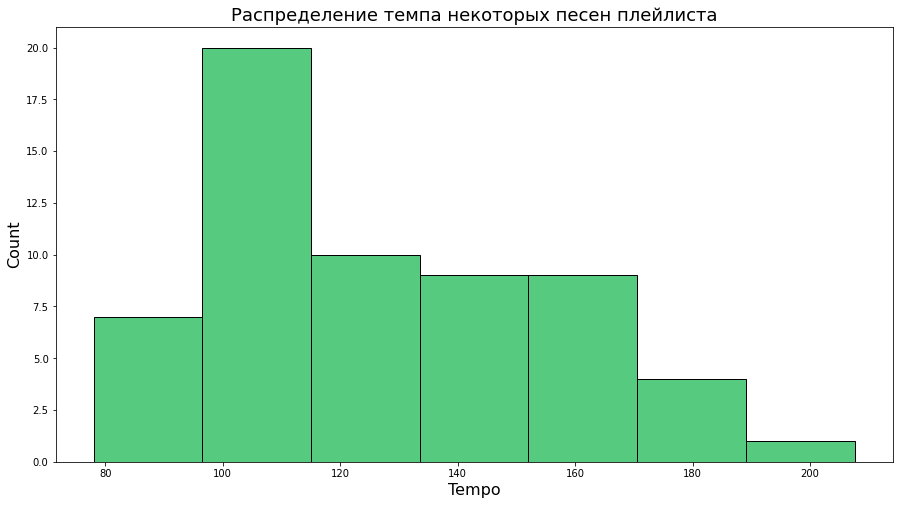

In [60]:
fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.histplot(x='tempo', data=playlist_df, color='#1db954')
plt.title("Распределение темпа некоторых песен плейлиста", fontsize = 18)
plt.ylabel("Count", fontsize=16)
plt.xlabel("Tempo", fontsize=16)
plt.show()

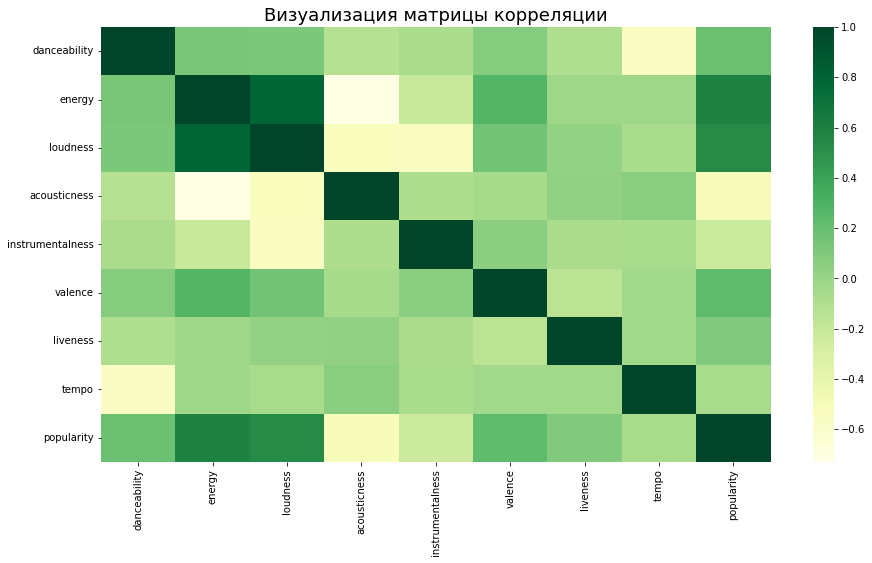

In [41]:
fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)
numeric_data = playlist_df.select_dtypes(include=[np.number])
corrMatrix=numeric_data.corr()
ax = sns.heatmap(corrMatrix, cmap='YlGn')
plt.title('Визуализация матрицы корреляции', fontsize = 18)
plt.show()

# Model + Preprocessing 

In [365]:
spotify_data = pd.read_csv('SpotifyFeatures.csv')

In [366]:
spotify_data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [367]:
genre_OHE = pd.get_dummies(spotify_data.genre)
p_genre_OHE = pd.get_dummies(playlist_df.genre)
genre_OHE.head()

,A Capella,Alternative,Anime,Blues,Children's Music,Children’s Music,Classical,Comedy,Country,Dance,...,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [368]:
from sklearn.preprocessing import MinMaxScaler
StandardScaler = MinMaxScaler()

numeric_data = spotify_data.select_dtypes(include=[np.number])
p_numeric_data = playlist_df.select_dtypes(include=[np.number])

playlist_data_numeric = StandardScaler.fit_transform(p_numeric_data)
spotify_data_numeric = StandardScaler.fit_transform(numeric_data)

playlist_data_numeric = pd.DataFrame(playlist_data_numeric, columns=['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'liveness', 'tempo', 'popularity', 'speechiness'])
spotify_data_numeric= pd.DataFrame(spotify_data_numeric, columns=['popularity','acousticness', 'danceability', 'duration_ms', 'energy' ,'instrumentalness', 'liveness', 'loudness','speechiness','tempo','valence'])

In [369]:
spotify_data = spotify_data.join(genre_OHE)
playlist_df = playlist_df.join(p_genre_OHE)

In [370]:
spotify_data.drop(['popularity','acousticness', 'danceability', 'duration_ms', 'energy' ,'instrumentalness', 'liveness', 'loudness','speechiness','tempo','valence'], axis=1, inplace=True)
spotify_data[['popularity','acousticness', 'danceability', 'duration_ms', 'energy' ,'instrumentalness', 'liveness', 'loudness','speechiness','tempo','valence']] = spotify_data_numeric
spotify_data.drop(['genre', 'artist_name', 'track_name', 'time_signature', 'track_name', 'key', 'mode', 'duration_ms'], axis=1, inplace=True)

In [371]:
playlist_df.drop(['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'liveness', 'tempo', 'popularity','speechiness', 'genre'], axis=1, inplace=True)
playlist_df[['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'liveness', 'tempo', 'popularity','speechiness']] = playlist_data_numeric

In [372]:
track_id = spotify_data['track_id']

In [392]:
len(spotify_data[spotify_data['track_id'].isin(playlist_df['track_id'].values)]['track_id'].unique())

30

Только половина из треков плейлиста присутствуют в датасете, что говорит об относительной уникальности предпочтений, иллюстрируемых плейлистом

In [373]:
spotify_data.columns

Index(['track_id', 'A Capella', 'Alternative', 'Anime', 'Blues',
       'Children's Music', 'Children’s Music', 'Classical', 'Comedy',
       'Country', 'Dance', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz',
       'Movie', 'Opera', 'Pop', 'R&B', 'Rap', 'Reggae', 'Reggaeton', 'Rock',
       'Ska', 'Soul', 'Soundtrack', 'World', 'popularity', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

In [374]:
playlist_df.columns

Index(['artist', 'track_name', 'track_id', 'url', 'date_added', 'album rock',
       'alternative hip hop', 'alternative metal', 'canadian pop punk',
       'classic russian rock', 'glam metal', 'horror punk', 'modern rock',
       'permanent wave', 'russian punk', 'danceability', 'energy', 'loudness',
       'acousticness', 'instrumentalness', 'valence', 'liveness', 'tempo',
       'popularity', 'speechiness'],
      dtype='object')

In [375]:
from datetime import datetime

In [376]:
playlist_df

,artist,track_name,track_id,url,date_added,album rock,alternative hip hop,alternative metal,canadian pop punk,classic russian rock,...,danceability,energy,loudness,acousticness,instrumentalness,valence,liveness,tempo,popularity,speechiness
0,Linkin Park,Numb,2nLtzopw4rPReszdYBJU6h,https://i.scdn.co/image/ab67616d00001e02b4ad7e...,2022-05-24 16:48:44+00:00,0,0,1,0,0,...,0.494540,0.832911,0.837298,0.005146,0.000000,0.147023,0.688538,0.246970,0.968254,0.035371
1,Linkin Park,In the End,60a0Rd6pjrkxjPbaKzXjfq,https://i.scdn.co/image/ab67616d00001e02e2f039...,2022-05-24 16:48:53+00:00,0,0,1,0,0,...,0.588144,0.834177,0.692476,0.010729,0.000000,0.337789,0.196153,0.209340,1.000000,0.092813
2,Linkin Park,What I've Done,18lR4BzEs7e3qzc0KVkTpU,https://i.scdn.co/image/ab67616d00001e0246e207...,2022-05-24 16:49:01+00:00,0,0,1,0,0,...,0.692668,0.917722,0.741818,0.015796,0.000010,0.200486,0.114852,0.324940,0.904762,0.019242
3,Linkin Park,Somewhere I Belong,3fjmSxt0PskST13CSdBUFx,https://i.scdn.co/image/ab67616d00001e0289a8fa...,2022-05-24 17:26:22+00:00,0,0,1,0,0,...,0.424337,0.944304,0.870951,0.000415,0.000015,0.388821,0.255697,0.648723,0.793651,0.110074
4,Papa Roach,Last Resort,5W8YXBz9MTIDyrpYaCg2Ky,https://i.scdn.co/image/ab67616d00001e02985bf5...,2022-05-24 17:26:49+00:00,0,0,1,0,0,...,0.639626,0.867089,0.873904,0.000528,0.005157,0.692588,0.186992,0.097067,0.936508,0.098189
5,The Offspring,The Future Is Now,2B17416FS7vL5qljgqfm7L,https://i.scdn.co/image/ab67616d00001e024b44a3...,2022-05-24 17:28:44+00:00,0,0,1,0,0,...,0.330733,0.943038,1.000000,0.003946,0.000000,0.212637,0.397687,0.223535,0.539683,0.142049
6,The Offspring,Self Esteem,1FkoVC85Ds3mFoK0fVqEqP,https://i.scdn.co/image/ab67616d00001e020158cb...,2022-05-24 17:32:48+00:00,0,0,1,0,0,...,0.482059,0.831646,0.546980,0.022859,0.000000,0.709599,0.367915,0.204840,0.873016,0.062252
7,The Offspring,Come Out Swinging,3T8Ht5f3xUejqEctN3RGb6,https://i.scdn.co/image/ab67616d00001e022d4c59...,2022-05-24 17:33:00+00:00,0,0,1,0,0,...,0.123245,0.937975,0.684464,0.000000,0.033522,0.624544,0.014085,0.783196,0.492063,0.113469
8,The Offspring,Trust In You,6aUZTbyshptdpu7H6Mirjw,https://i.scdn.co/image/ab67616d00001e02890ce6...,2022-05-24 17:33:30+00:00,0,0,1,0,0,...,0.340094,0.916456,0.859649,0.000294,0.029182,0.668287,0.046605,0.714018,0.476190,0.092530
9,Misfits,Dig Up Her Bones,16MPZDpM5JTtIBs3pOMSWx,https://i.scdn.co/image/ab67616d00001e02f16064...,2022-05-24 17:34:29+00:00,0,0,0,0,0,...,0.535101,0.996203,0.790486,0.003632,0.000052,0.026731,0.113707,0.255214,0.523810,0.189304


In [377]:
def generate_playlist_vector(spotify_features, playlist_df, weight_factor):
    
    spotify_features_nonplaylist = spotify_features
    playlist_df = playlist_df.drop(['artist', 'track_name', 'url'], axis=1)
    
    playlist_feature_set = playlist_df.sort_values('date_added',ascending=False)
    
    
    most_recent_date = playlist_feature_set.iloc[0, 1]
    
    for ix, row in playlist_feature_set.iterrows():
        playlist_feature_set.loc[ix,'days_from_recent'] = int((most_recent_date.to_pydatetime() - row.iloc[1].to_pydatetime()).days)
        
    
    playlist_feature_set['weight'] = playlist_feature_set['days_from_recent'].apply(lambda x: weight_factor ** (-x))
    
    playlist_feature_set_weighted = playlist_feature_set.copy()
    playlist_feature_set_weighted.drop('date_added', axis = 1, inplace=True)
    
    playlist_feature_set_weighted.update(playlist_feature_set_weighted.iloc[:,:-2].mul(playlist_feature_set_weighted.weight.astype(int),0))   
    
    playlist_feature_set_weighted_final = playlist_feature_set_weighted.iloc[:, :-2]
    

    
    return playlist_feature_set_weighted_final.sum(axis = 0), spotify_features_nonplaylist

In [378]:
def generate_playlist_vector(spotify_features, playlist_df, weight_factor):
    
    spotify_features_playlist = spotify_features[spotify_features['track_id'].isin(playlist_df['track_id'].values)]
    spotify_features_playlist = spotify_features_playlist.merge(playlist_df[['track_id','date_added']], on = 'track_id', how = 'inner')
    
    spotify_features_nonplaylist = spotify_features[~spotify_features['track_id'].isin(playlist_df['track_id'].values)]
    
    playlist_feature_set = spotify_features_playlist.sort_values('date_added',ascending=False)
    
    
    most_recent_date = playlist_feature_set.iloc[0,-1]
    
    for ix, row in playlist_feature_set.iterrows():
        playlist_feature_set.loc[ix,'days_from_recent'] = int((most_recent_date.to_pydatetime() - row.iloc[-1].to_pydatetime()).days)
        
    
    playlist_feature_set['weight'] = playlist_feature_set['days_from_recent'].apply(lambda x: weight_factor ** (-x))
    
    playlist_feature_set_weighted = playlist_feature_set.copy()
    
    playlist_feature_set_weighted.update(playlist_feature_set_weighted.iloc[:,:-3].mul(playlist_feature_set_weighted.weight.astype(int),0))   
    
    playlist_feature_set_weighted_final = playlist_feature_set_weighted.iloc[:, :-3]
    

    
    return playlist_feature_set_weighted_final.sum(axis = 0), spotify_features_nonplaylist

In [379]:
playlist_vector, nonplaylist_df = generate_playlist_vector(spotify_data, playlist_df, 1.2)

In [380]:
print(playlist_vector.shape)
print(nonplaylist_df.shape)

(38,)
(232644, 38)


In [381]:
playlist_vector

track_id            6OMO6WdRhSfjMPAiPT94wH6OMO6WdRhSfjMPAiPT94wH6O...
A Capella                                                           0
Alternative                                                        24
Anime                                                               0
Blues                                                               0
Children's Music                                                    0
Children’s Music                                                   21
Classical                                                           0
Comedy                                                              0
Country                                                             0
Dance                                                               0
Electronic                                                          0
Folk                                                                0
Hip-Hop                                                             0
Indie               

In [382]:
nonplaylist_df

,track_id,A Capella,Alternative,Anime,Blues,Children's Music,Children’s Music,Classical,Comedy,Country,...,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0BRjO6ga9RKCKjfDqeFgWV,0,0,0,0,0,0,0,0,0,...,0.00,0.613454,0.356292,0.910909,0.000000,0.339614,0.900856,0.032070,0.642704,0.814
1,0BjC1NfoEOOusryehmNudP,0,0,0,0,0,0,0,0,0,...,0.01,0.246988,0.571934,0.737732,0.000000,0.142710,0.834469,0.068374,0.675801,0.816
2,0CoSDzoNIKCRs124s9uTVy,0,0,0,0,0,0,0,0,0,...,0.03,0.955823,0.650252,0.131113,0.000000,0.094241,0.686429,0.014818,0.325182,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,0,0,0,0,0,0,0,0,0,...,0.00,0.705823,0.196438,0.326313,0.000000,0.089697,0.716695,0.018311,0.665238,0.227
4,0IuslXpMROHdEPvSl1fTQK,0,0,0,0,0,0,0,0,0,...,0.04,0.953815,0.294067,0.225209,0.123123,0.194208,0.557054,0.024767,0.518516,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,2XGLdVl7lGeq8ksM6Al7jT,0,0,0,0,0,0,0,0,0,...,0.39,0.003855,0.676000,0.714709,0.544545,0.075561,0.744311,0.009949,0.400722,0.962
232721,1qWZdkBl4UVPj9lK6HuuFM,0,0,0,0,0,0,0,0,0,...,0.38,0.033032,0.781139,0.683677,0.000881,0.229550,0.809825,0.012172,0.392666,0.969
232722,2ziWXUmQLrXTiYjCg2fZ2t,0,0,0,0,0,0,0,0,0,...,0.47,0.904618,0.493617,0.419408,0.000000,0.085658,0.786018,0.133150,0.252941,0.813
232723,6EFsue2YbIG4Qkq8Zr9Rir,0,0,0,0,0,0,0,0,0,...,0.44,0.263052,0.738226,0.704699,0.000000,0.326487,0.806391,0.131033,0.327737,0.489


In [383]:
from sklearn.metrics.pairwise import cosine_similarity

In [384]:
def generate_recommendation(spotify_data, playlist_vector, nonplaylist_df):

    non_playlist = spotify_data[spotify_data['track_id'].isin(nonplaylist_df['track_id'].values)]
    non_playlist['sim'] = cosine_similarity(nonplaylist_df.drop(['track_id'], axis = 1).values, playlist_vector.drop(labels = 'track_id').values.reshape(1, -1))[:,0]
    non_playlist_top15 = non_playlist.sort_values('sim',ascending = False).head(15)
    non_playlist_top15['url'] = non_playlist_top15['track_id'].apply(lambda x: sp.track(x)['album']['images'][1]['url'])
    
    return  non_playlist_top15

In [385]:
top15 = generate_recommendation(spotify_data, playlist_vector, nonplaylist_df)  

/tmp/ipykernel_98/43927750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_playlist['sim'] = cosine_similarity(nonplaylist_df.drop(['track_id'], axis = 1).values, playlist_vector.drop(labels = 'track_id').values.reshape(1, -1))[:,0]


In [386]:
top15

,track_id,A Capella,Alternative,Anime,Blues,Children's Music,Children’s Music,Classical,Comedy,Country,...,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,sim,url
1175,4CbKVDZkYKdv69I4bCaKUq,0,1,0,0,0,0,0,0,0,...,0.510782,0.967967,0.000000,0.329516,0.888134,0.081816,0.525301,0.782,0.917505,https://i.scdn.co/image/ab67616d00001e0243e531...
1150,6n9yCXvLhnYMgJIiIcMu7D,0,1,0,0,0,0,0,0,0,...,0.599828,0.910909,0.000000,0.336585,0.879931,0.017358,0.534970,0.693,0.916839,https://i.scdn.co/image/ab67616d00001e02105db7...
1122,2UREu1Y8CO4jXkbvqAtP7g,0,1,0,0,0,0,0,0,0,...,0.625577,0.957957,0.000000,0.069906,0.891817,0.054932,0.492241,0.692,0.916742,https://i.scdn.co/image/ab67616d00001e0243e531...
2739,7j43FohbLVulScL7S9sQZk,0,1,0,0,0,0,0,0,0,...,0.669563,0.912911,0.001361,0.352741,0.859380,0.073031,0.445371,0.479,0.916368,https://i.scdn.co/image/ab67616d00001e0202add2...
1303,7CpbhqKUedOIrcvc94p60Y,0,1,0,0,0,0,0,0,0,...,0.642742,0.932932,0.001471,0.135642,0.872796,0.051439,0.473156,0.544,0.916256,https://i.scdn.co/image/ab67616d00001e0226d45b...
2788,6O7pihLJgeqxUnG7u9oYL2,0,1,0,0,0,0,0,0,0,...,0.536530,0.978979,0.000004,0.280038,0.862832,0.028683,0.562327,0.499,0.915081,https://i.scdn.co/image/ab67616d00001e020099ef...
1167,4eAwB5pnKFTmsgc3zWoYO0,0,1,0,0,0,0,0,0,0,...,0.598755,0.949949,0.000003,0.049307,0.870750,0.034610,0.478092,0.586,0.913875,https://i.scdn.co/image/ab67616d00001e02c41822...
1610,1SDl9wY1MqbpJQW0yKEWxL,0,1,0,0,0,0,0,0,0,...,0.482888,0.966966,0.000000,0.329516,0.886497,0.025191,0.497149,0.502,0.913814,https://i.scdn.co/image/ab67616d00001e02f97554...
1238,5OQsiBsky2k2kDKy2bX2eT,0,1,0,0,0,0,0,0,0,...,0.437829,0.919918,0.000021,0.254794,0.861764,0.019687,0.496970,0.537,0.913707,https://i.scdn.co/image/ab67616d00001e02175963...
1315,5m7on0zpnmeAXy72ANrmfU,0,1,0,0,0,0,0,0,0,...,0.479670,0.957957,0.000000,0.179062,0.886105,0.032494,0.492340,0.676,0.913610,https://i.scdn.co/image/ab67616d00001e023a7c61...


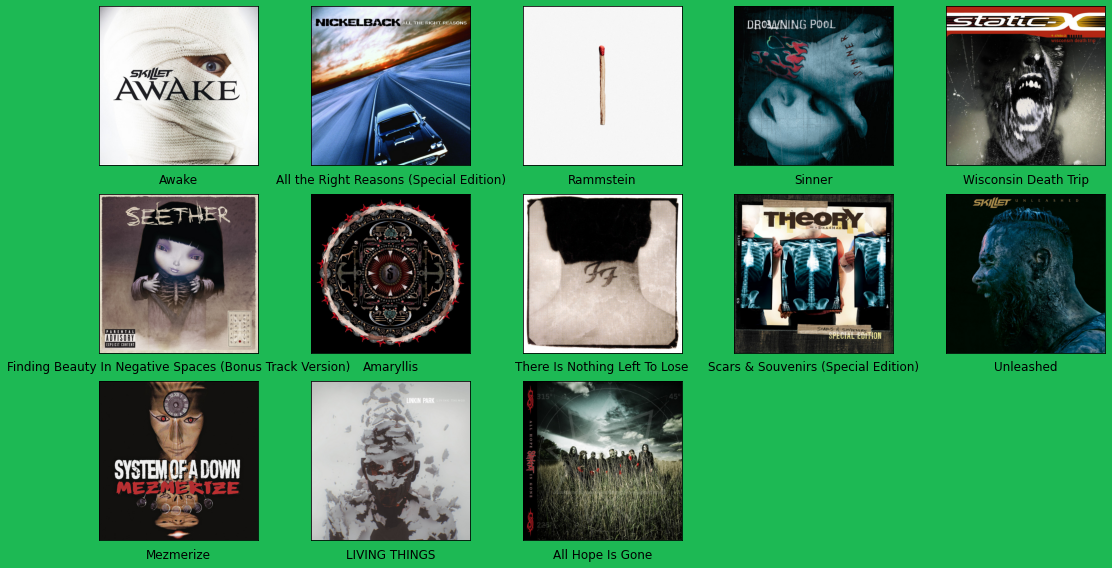

In [387]:
visualize_cover_art(top15)